In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas --quiet

In [ ]:
# Download the dataset
!wget 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz' -P drive/MyDrive/datasets/

--2024-10-28 18:18:13--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘drive/MyDrive/datasets/aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  28.6MB/s    in 2.8s    

2024-10-28 18:18:15 (28.6 MB/s) - ‘drive/MyDrive/datasets/aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
!tar -xvzf drive/MyDrive/datasets/aclImdb_v1.tar.gz -C drive/MyDrive/datasets/

In [ ]:
neg_dir_train = '/content/drive/MyDrive/datasets/aclImdb/train/neg/'
pos_dir_train = '/content/drive/MyDrive/datasets/aclImdb/train/pos/'

neg_dir_test = '/content/drive/MyDrive/datasets/aclImdb/test/neg/'
pos_dir_test = '/content/drive/MyDrive/datasets/aclImdb/test/pos/'

In [ ]:
# get all .txt files from the directories
import glob
neg_files_train = glob.glob(neg_dir_train + '*.txt')
pos_files_train = glob.glob(pos_dir_train + '*.txt')

neg_files_test = glob.glob(neg_dir_test + '*.txt')
pos_files_test = glob.glob(pos_dir_test + '*.txt')

In [ ]:
print(f'Training Data Shape: {(len(neg_files_train), len(pos_files_train))}')
print(f'Testing Data Shape:  {(len(neg_files_test), len(pos_files_test))}')

Training Data Shape: (12500, 12500)
Testing Data Shape:  (12500, 12500)


In [ ]:
# importing reviews with scores - training data
import pandas as pd

data = []
for file in neg_files_train:
  with open(file, 'r') as f:
    file_name = f.name.split('/')[-1]
    score = file_name.split('_')[1].split('.')[0]
    data.append({'review' : f.read(), 'score' : int(score)})
neg_reviews_train = pd.DataFrame(data)

data = []
for file in pos_files_train:
  with open(file, 'r') as f:
    file_name = f.name.split('/')[-1]
    score = file_name.split('_')[1].split('.')[0]
    data.append({'review' : f.read(), 'score' : int(score)})

pos_reviews_train = pd.DataFrame(data)
data = pd.concat([neg_reviews_train, pos_reviews_train])

In [ ]:
# importing reviews with scores - testing data
import pandas as pd

data_test = []
for file in neg_files_test:
  with open(file, 'r') as f:
    file_name = f.name.split('/')[-1]
    score = file_name.split('_')[1].split('.')[0]
    data_test.append({'review' : f.read(), 'score' : int(score)})
neg_reviews_test = pd.DataFrame(data_test)

data_test = []
for file in pos_files_test:
  with open(file, 'r') as f:
    file_name = f.name.split('/')[-1]
    score = file_name.split('_')[1].split('.')[0]
    data_test.append({'review' : f.read(), 'score' : int(score)})

pos_reviews_test = pd.DataFrame(data_test)
data_test = pd.concat([neg_reviews_test, pos_reviews_test])

In [ ]:
neg_reviews_train.to_csv('drive/MyDrive/datasets/aclImdb/train/neg_reviews.csv', index=False)
pos_reviews_train.to_csv('drive/MyDrive/datasets/aclImdb/train/pos_reviews.csv', index=False)

neg_reviews_test.to_csv('drive/MyDrive/datasets/aclImdb/test/neg_reviews.csv', index=False)
pos_reviews_test.to_csv('drive/MyDrive/datasets/aclImdb/test/pos_reviews.csv', index=False)

# shuffle data and then save
data = data.sample(frac=1).reset_index(drop=True)
data.to_csv('drive/MyDrive/datasets/aclImdb/reviews.csv', index=False)

data_test = data_test.sample(frac=1).reset_index(drop=True)
data_test.to_csv('drive/MyDrive/datasets/aclImdb/test_reviews.csv', index=False)

# Importig the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/datasets/aclImdb/reviews.csv')
data_test = pd.read_csv('drive/MyDrive/datasets/aclImdb/test_reviews.csv')

In [ ]:
data.head()

review  score sentiment  length  \
0  I rented I AM CURIOUS-YELLOW from my video sto...      4  negative     282   
1  "I Am Curious: Yellow" is a risible and preten...      1  negative     214   
2  If only to avoid making this type of film in t...      1  negative      87   
3  This film was probably inspired by Godard's Ma...      2  negative     114   
4  Oh, brother...after hearing about this ridicul...      1  negative     297   

                                              tokens  \
0  ['rented', 'curious-yellow', 'video', 'store',...   
1  ['``', 'curious', 'yellow', "''", 'risible', '...   
2  ['avoid', 'making', 'type', 'film', 'future', ...   
3  ['film', 'probably', 'inspired', 'godard', "'s...   
4  ['oh', 'brother', '...', 'hearing', 'ridiculou...   

                                      stemmed_tokens  \
0  ['rent', 'curious-yellow', 'video', 'store', '...   
1  ['``', 'curiou', 'yellow', "''", 'risibl', 'pr...   
2  ['avoid', 'make', 'type', 'film', 'futur', 'fi...   
3  ['film', 'probabl', 'inspir', 'godard', "'s", ...   
4  ['oh', 'brother', '...', 'hear', 'ridicul', 'f...   

                                   lemmatized_tokens  \
0  ['rent', 'curious-yellow', 'video', 'store', '...   
1  ['``', 'curious', 'yellow', "''", 'risible', '...   
2  ['avoid', 'make', 'type', 'film', 'future', 'f...   
3  ['film', 'probably', 'inspire', 'godard', "'s"...   
4  ['oh', 'brother', '...', 'hearing', 'ridiculou...   

                                      stemmed_review  \
0  rent curious-yellow video store controversi su...   
1  `` curiou yellow '' risibl pretenti steam pile...   
2  avoid make type film futur film interest exper...   
3  film probabl inspir godard 's masculin féminin...   
4  oh brother ... hear ridicul film umpteen year ...   

                                   lemmatized_review  
0  rent curious-yellow video store controversy su...  
1  `` curious yellow '' risible pretentious steam...  
2  avoid make type film future film interest expe...  
3  film probably inspire godard 's masculin fémin...  
4  oh brother ... hearing ridiculous film umpteen...

Here score of 1 is the most negative and 10 is the most positive

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25000 non-null  object
 1   score   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


<Axes: xlabel='score'>

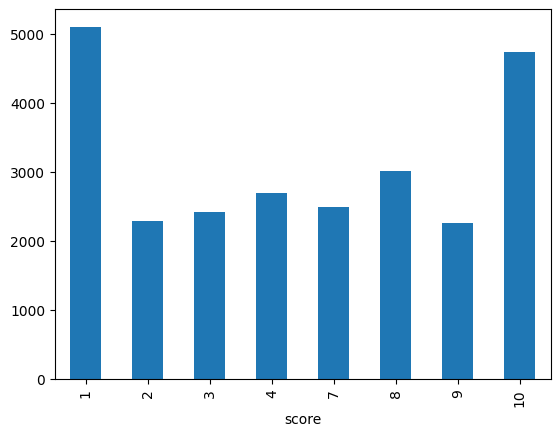

In [ ]:
#visualize the distribution sentiments
import seaborn as sns
data['score'].value_counts().sort_index().plot(kind='bar')

In [ ]:
# Labelling the sentiments: Negative(1-4), Positive(7 - 10)
data['sentiment'] = data['score'].apply(lambda x: 'positive' if x >= 7 else 'negative')
data_test['sentiment'] = data_test['score'].apply(lambda x: 'positive' if x >= 7 else 'negative')

In [ ]:
data.head()

review  score sentiment
0  For a comedy this has a decent and inventive p...     10  positive
1  Midnight Cowboy made a big fuss when it was re...      7  positive
2  Updated from a previous comment. The great and...     10  positive
3  This movie was a really great flick about some...      8  positive
4  I loved this movie. I knew it would be chocked...      9  positive

<Axes: xlabel='sentiment'>

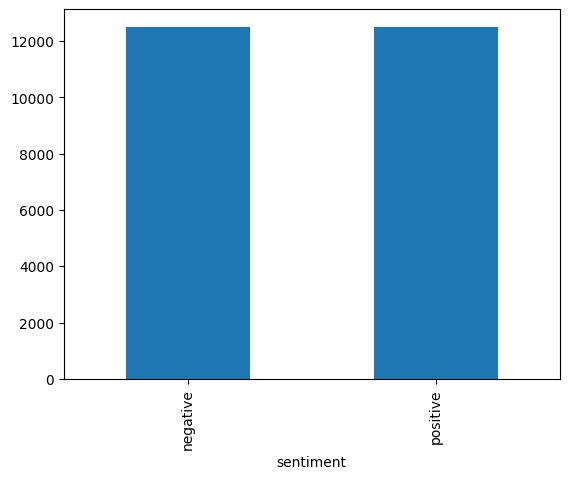

In [ ]:
# sentiment distribution
data['sentiment'].value_counts().sort_index().plot(kind='bar')

In [ ]:
ckpt_1 = data.copy()

# Removing the unwanted elements

In [ ]:
import re

def find_unwanted_elements(reviews):
  unwanted_elements = []
  for review in reviews:
        found_tags = re.findall(r'<.*?>', review)
        unwanted_elements.extend(found_tags)

  return list(set(unwanted_elements))

unwanted_words = find_unwanted_elements(data['review'])
unwanted_words_test = find_unwanted_elements(data_test['review'])

print("Unwanted elements found in training data:")
print(unwanted_words)

print("\nUnwanted elements found in testing data:")
print(unwanted_words_test)

Unwanted elements found in training data:
['<em>', '<3 <br />', '<br />', '<grin>', '< than 30 minutes of watching, being bored and irritated. <br />', '</SPOILER>', '<sp?) classic "Romeo & Juliet". Guess I\'ll have to rent that next.<br />', '< who was to be a victim, but woman-power trumps evil scientist every time.<br />', '<hr>', '<SPOILER>', '< and make notes for my partial "review" to show how foolish the movie is. "Resident Evil" (horror) or "Dude, Where\'s My Car?" (comedy) I can watch over and over again and still enjoy! But this...!<br />', '</i>', "< $600 per screen its opening weekend, and just over $400 each, after its month's theater run in latter 2002. Overall gross was $261K, which I'd doubt could cover cast and crew's hotel and food for a week on location.<br />", '</em>', '<i>', '<<<sigh>', '<=8.<br />', '<http://rogerebert.suntimes.com/apps/pbcs.dll/section?category=ANSWERMAN>']

Unwanted elements found in testing data:
['<<<<<br />', '<< controversial.<br />', '<br 

In [ ]:
words_to_remove = ['<=8.<br />', '<<<sigh>' , '<http://rogerebert.suntimes.com/apps/pbcs.dll/section?category=ANSWERMAN>', '<br />', '</i>',
                   '</em>', '<em>', '</SPOILER>', '<SPOILER>', '<hr>', '<i>']
words_to_remove_test = ['<<<<<br />', '<br />', '<p>','<<<<<<br />', '</i>', '<i>', '<33<br />']

In [ ]:
def remove_words_from_reviews(reviews, words_to_remove):
  cleaned_reviews = []
  for review in reviews:
    for word in words_to_remove:
      review = review.replace(word, '')
    cleaned_reviews.append(review)
  return cleaned_reviews

data['review'] = remove_words_from_reviews(data['review'], words_to_remove)
data_test['review'] = remove_words_from_reviews(data_test['review'], words_to_remove_test)

In [ ]:
chkpt_2 = data.copy()
chkpt_2_test = data_test.copy()

# Length Analysis

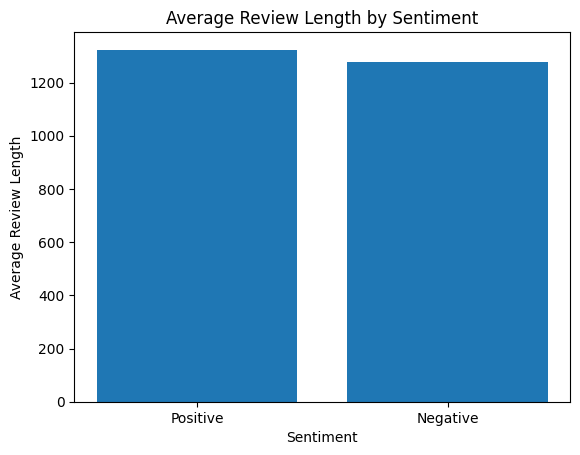

In [ ]:
import matplotlib.pyplot as plt

# Average length of positive and negative reviews
avg_length_positive = data[data['sentiment'] == 'positive']['review'].str.len().mean()
avg_length_negative = data[data['sentiment'] == 'negative']['review'].str.len().mean()

sentiment_labels = ['Positive', 'Negative']
average_lengths = [avg_length_positive, avg_length_negative]

plt.bar(sentiment_labels, average_lengths)
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.title('Average Review Length by Sentiment')
plt.show()

<Axes: ylabel='Count'>

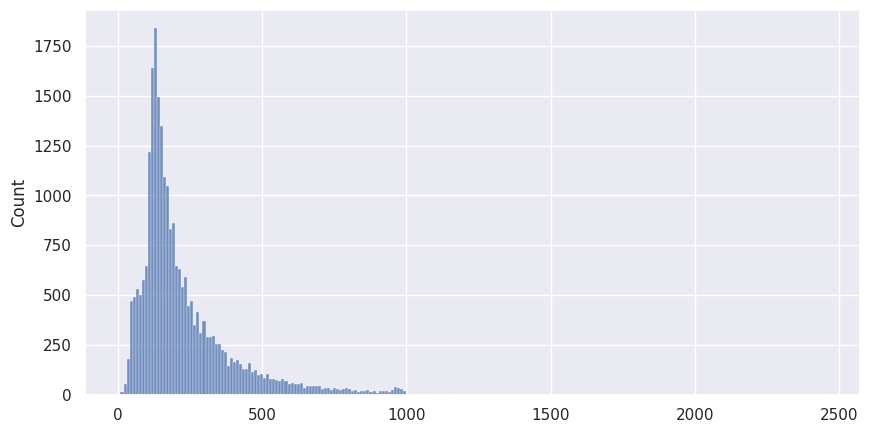

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)

review_len = pd.Series([len(review.split()) for review in data['review']])
plt.figure(figsize = (10,5))
sns.histplot(review_len)

Length Analysis of Positive Reviews

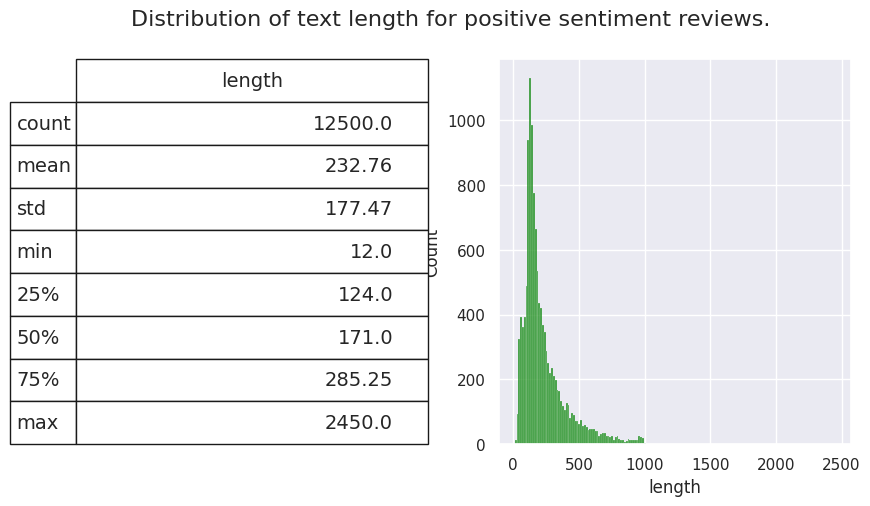

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,5))
data['length'] = data.review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['sentiment']=='positive']['length'], ax=ax1, color='green')
describe = data.length[data.sentiment=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment reviews.', fontsize=16)

plt.show()

Length Analysis of Negative Reviews

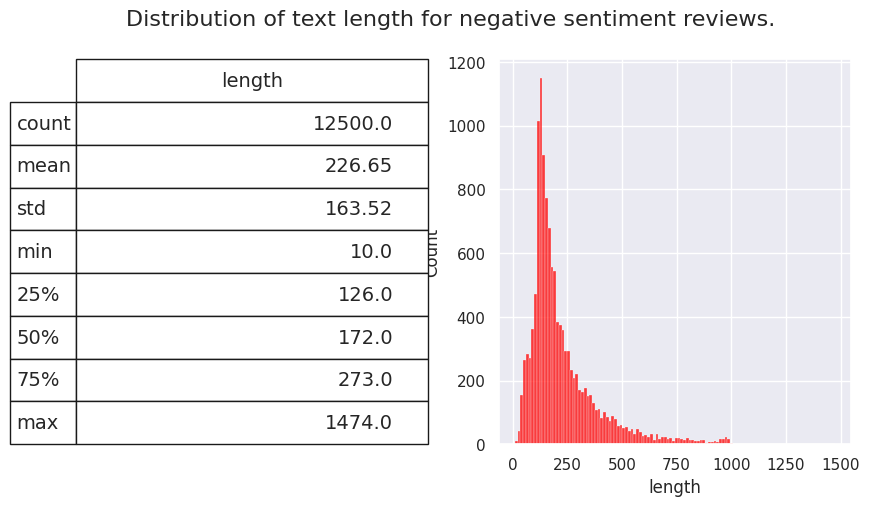

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,5))
data['length'] = data.review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['sentiment']=='negative']['length'], ax=ax1, color='red')
describe = data.length[data.sentiment=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment reviews.', fontsize=16)

plt.show()

# Word Frequency Analysis and Word Cloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Top 10 words for positive reviews:
[('film', 20289), ('movie', 18489), ('one', 13096), ('like', 8734), ('good', 7429), ('story', 6552), ('great', 6293), ('time', 6054), ('see', 5844), ('would', 5713)]


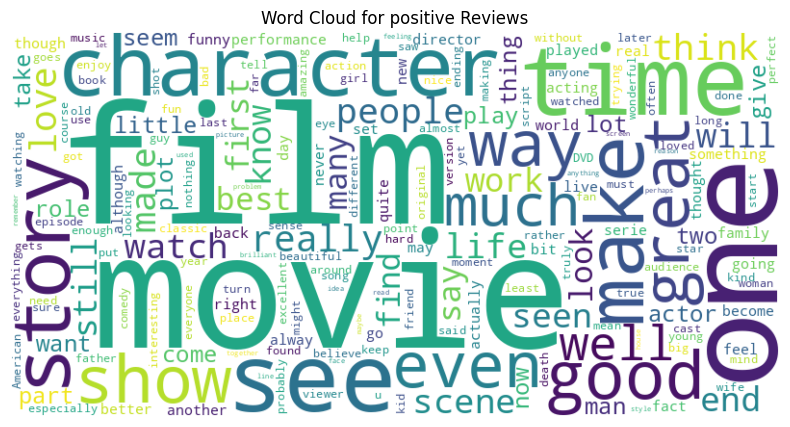


Top 10 words for negative reviews:
[('movie', 24097), ('film', 18475), ('one', 12478), ('like', 10930), ('would', 7665), ('even', 7578), ('good', 7183), ('bad', 7121), ('really', 6231), ('time', 5850)]


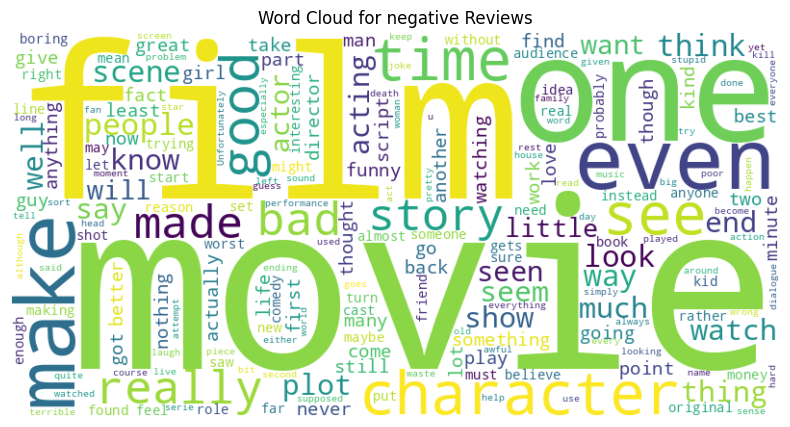

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
stop_words = set(stopwords.words('english'))

for sentiment in ['positive', 'negative']:
    text = ' '.join(data[data['sentiment'] == sentiment]['review'])
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    word_freq = Counter(words)

    print(f"\nTop 10 words for {sentiment} reviews:")
    print(word_freq.most_common(10))

    generate_wordcloud(text, f'Word Cloud for {sentiment} Reviews')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Top 10 words for score 1:
[('movie', 10944), ('film', 6868), ('one', 4825), ('like', 4339), ('bad', 3543), ('even', 3413), ('would', 3274), ('good', 2478), ('could', 2405), ('time', 2371)]

Top 10 words for score 2:
[('movie', 4329), ('film', 3210), ('one', 2397), ('like', 1969), ('even', 1370), ('would', 1331), ('bad', 1266), ('good', 1257), ('really', 1141), ('could', 1071)]

Top 10 words for score 3:
[('movie', 4335), ('film', 3924), ('one', 2602), ('like', 2329), ('good', 1562), ('even', 1445), ('would', 1442), ('really', 1358), ('bad', 1196), ('much', 1175)]

Top 10 words for score 4:
[('movie', 4489), ('film', 4473), ('one', 2654), ('like', 2293), ('good', 1886), ('would', 1618), ('really', 1470), ('much', 1441), ('story', 1360), ('even', 1350)]

Top 10 words for score 7:
[('film', 4699), ('movie', 3576), ('one', 2624), ('good', 2064), ('like', 1974), ('story', 1475), ('well', 1294), ('really', 1242), ('would', 1235), ('time', 1214)]

Top 10 words for score 8:
[('film', 5152), (

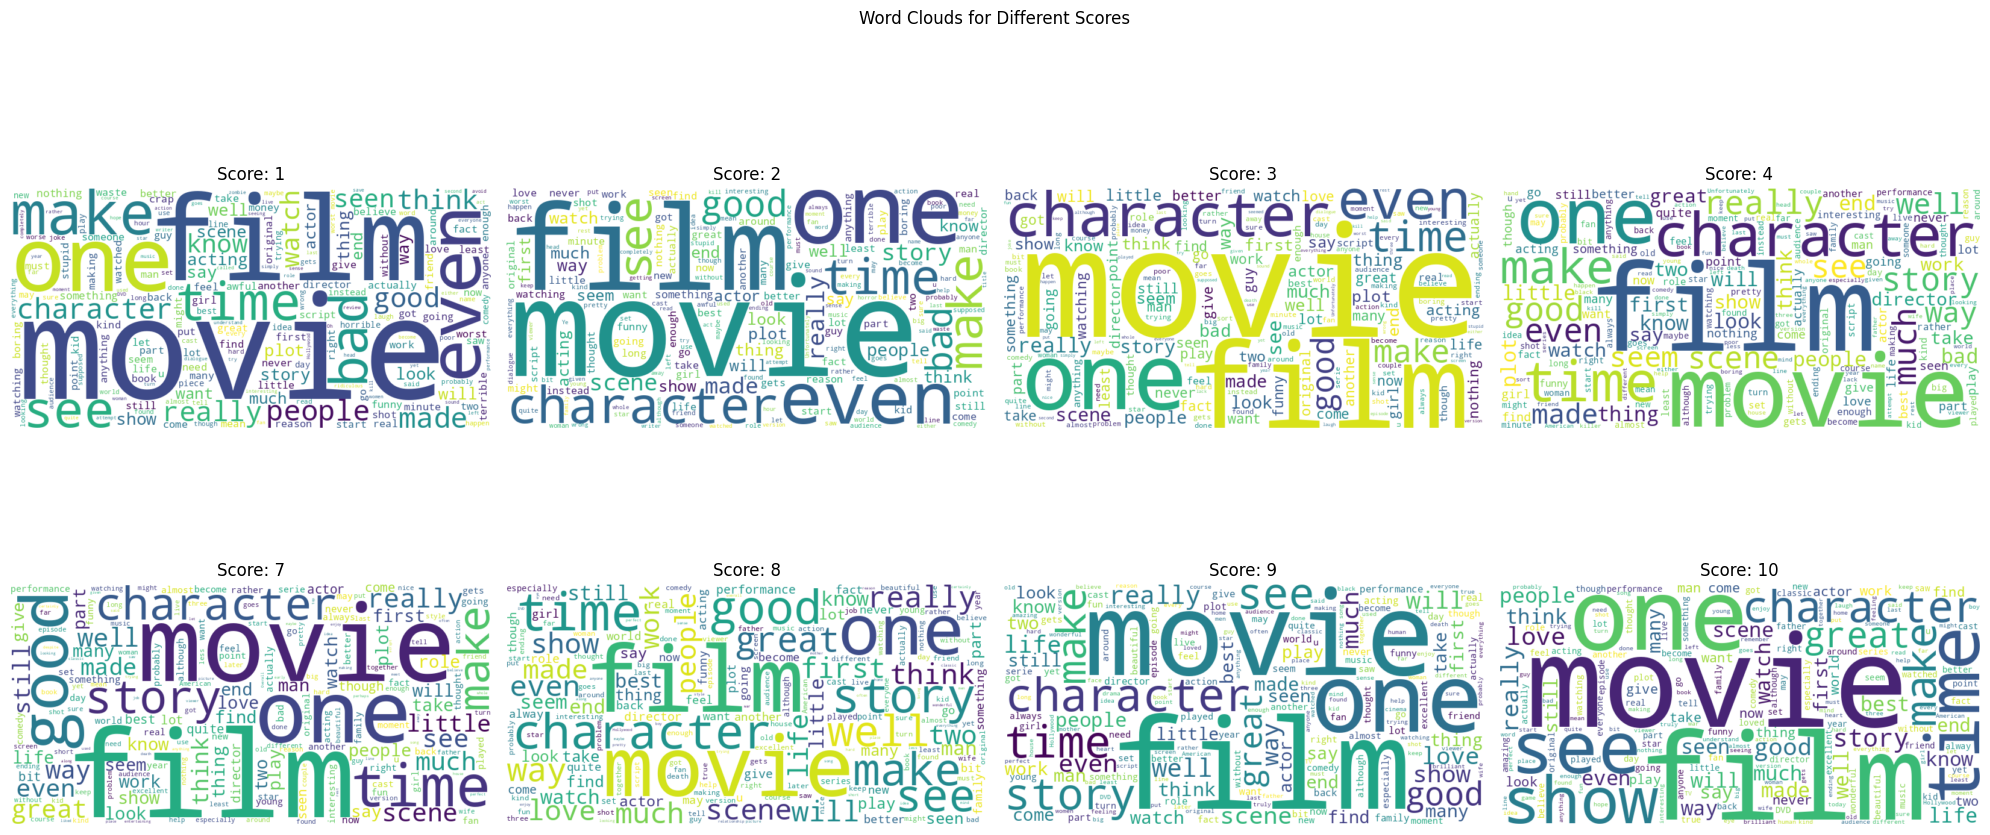

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


# Create a grid of subplots for wordclouds
num_scores = 10
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle("Word Clouds for Different Scores")

for score in range(1, num_scores + 1):
  if score == 5 or score == 6:
    continue

  if score > 6:
    row = (score - 3) // cols
    col = (score - 3) % cols
  else:
    row = (score - 1) // cols
    col = (score - 1) % cols

  # Filter reviews based on score
  text = ' '.join(data[data['score'] == score]['review'])

  if text:  # Check if there are reviews for this score
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    word_freq = Counter(words)
    print(f"\nTop 10 words for score {score}:")
    print(word_freq.most_common(10))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Score: {score}")

plt.tight_layout()
plt.show()

Skipping the common words like 'one', 'film', 'movie' and then generating the wordcloud


Top 10 words for score 1:
[('like', 4339), ('bad', 3543), ('even', 3413), ('would', 3274), ('good', 2478), ('could', 2405), ('time', 2371), ('see', 2282), ('really', 2262), ('people', 2145)]

Top 10 words for score 2:
[('like', 1969), ('even', 1370), ('would', 1331), ('bad', 1266), ('good', 1257), ('really', 1141), ('could', 1071), ('time', 1054), ('see', 989), ('story', 975)]

Top 10 words for score 3:
[('like', 2329), ('good', 1562), ('even', 1445), ('would', 1442), ('really', 1358), ('bad', 1196), ('much', 1175), ('time', 1166), ('story', 1100), ('could', 1088)]

Top 10 words for score 4:
[('like', 2293), ('good', 1886), ('would', 1618), ('really', 1470), ('much', 1441), ('story', 1360), ('even', 1350), ('time', 1259), ('could', 1128), ('bad', 1116)]

Top 10 words for score 7:
[('good', 2064), ('like', 1974), ('story', 1475), ('well', 1294), ('really', 1242), ('would', 1235), ('time', 1214), ('also', 1197), ('much', 1115), ('great', 1062)]

Top 10 words for score 8:
[('like', 2178)

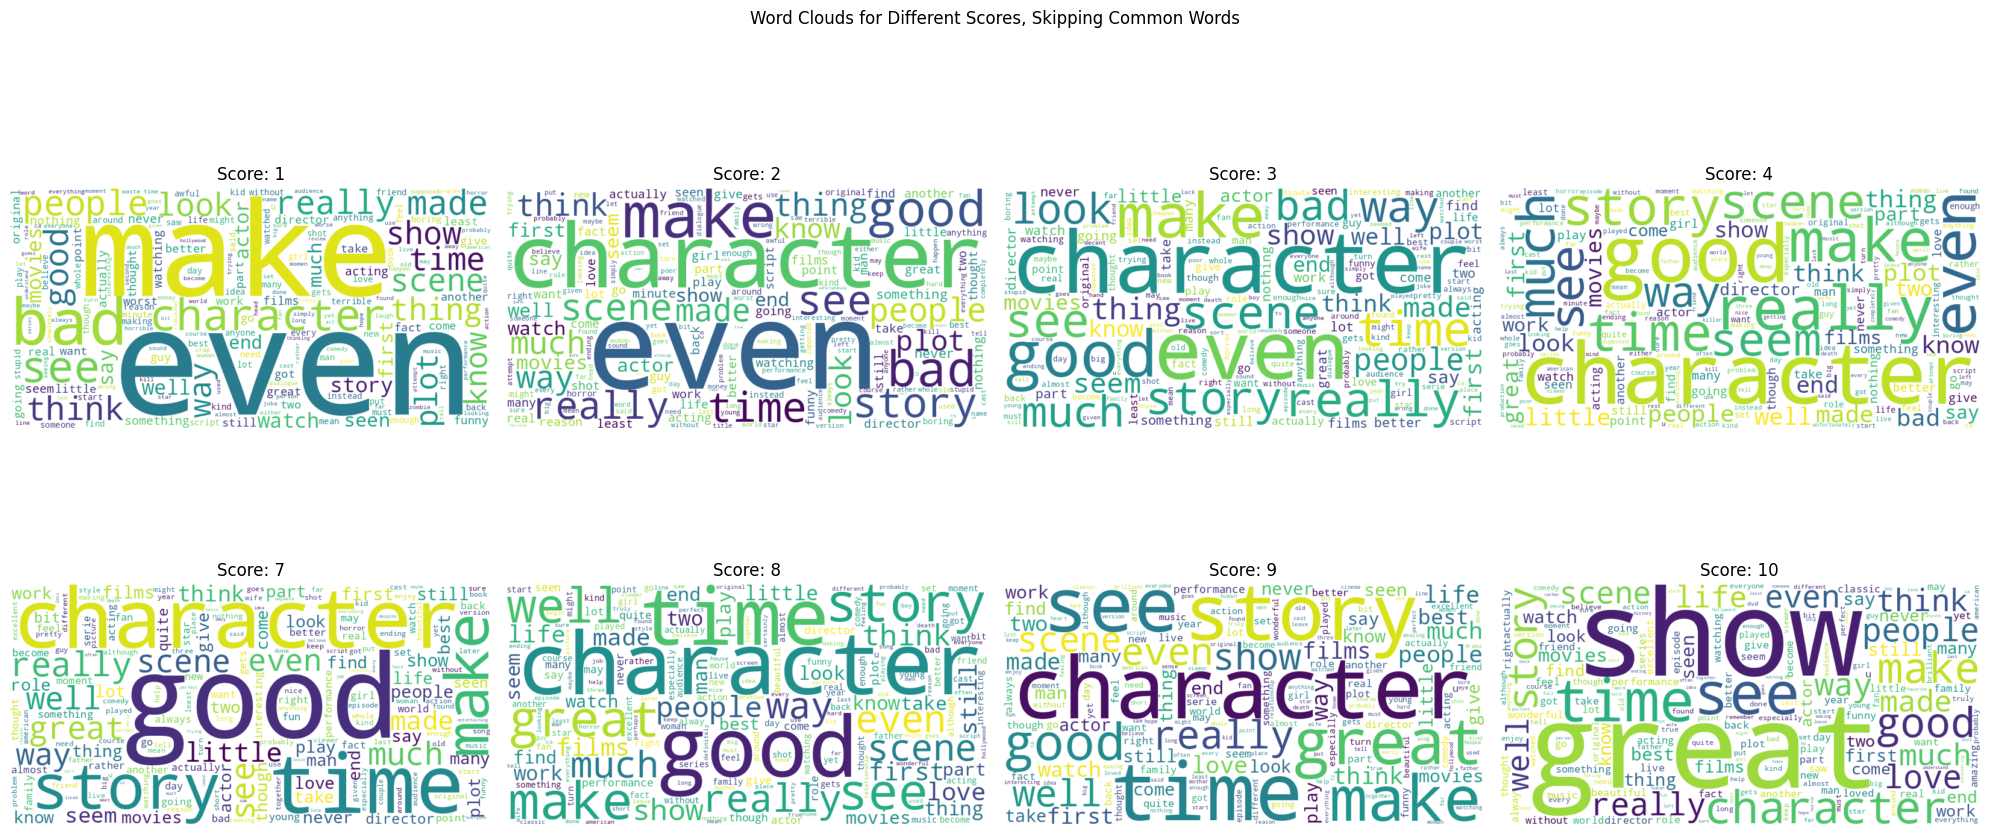

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle("Word Clouds for Different Scores, Skipping Common Words")
stop_words.add('one')
stop_words.add('film')
stop_words.add('movie')

for score in range(1, num_scores + 1):
  if score == 5 or score == 6:
    continue

  if score > 6:
    row = (score - 3) // cols
    col = (score - 3) % cols
  else:
    row = (score - 1) // cols
    col = (score - 1) % cols

  # Filter reviews based on score
  text = ' '.join(data[data['score'] == score]['review'])

  if text:  # Check if there are reviews for this score
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    word_freq = Counter(words)
    print(f"\nTop 10 words for score {score}:")
    print(word_freq.most_common(10))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Score: {score}")

plt.tight_layout()
plt.show()

# N-Gram analysis

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk


def get_top_ngrams(text, n, top_k):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    n_grams = ngrams(tokens, n)
    return Counter(n_grams).most_common(top_k)

for sentiment in ['positive', 'negative']:
    text = ' '.join(data[data['sentiment'] == sentiment]['review'])

    print(f"\nTop 10 bigrams for {sentiment} reviews:")
    print(get_top_ngrams(text, 2, 10))

    print(f"\nTop 10 trigrams for {sentiment} reviews:")
    print(get_top_ngrams(text, 3, 10))


Top 10 bigrams for positive reviews:
[(('even', 'though'), 550), (('ever', 'seen'), 477), (('first', 'time'), 475), (('new', 'york'), 467), (('special', 'effects'), 406), (('years', 'ago'), 372), (('well', 'done'), 304), (('real', 'life'), 295), (('pretty', 'good'), 294), (('years', 'later'), 275)]

Top 10 trigrams for positive reviews:
[(('new', 'york', 'city'), 113), (('world', 'war', 'ii'), 66), (('first', 'time', 'saw'), 59), (('movies', 'ever', 'seen'), 54), (('based', 'true', 'story'), 47), (('would', 'love', 'see'), 44), (('films', 'ever', 'made'), 43), (('well', 'worth', 'watching'), 42), (('best', 'ever', 'seen'), 39), (('movies', 'ever', 'made'), 36)]

Top 10 bigrams for negative reviews:
[(('ever', 'seen'), 788), (('waste', 'time'), 715), (('special', 'effects'), 659), (('looks', 'like'), 624), (('much', 'better'), 481), (('even', 'though'), 450), (('look', 'like'), 427), (('worst', 'ever'), 412), (('low', 'budget'), 397), (('pretty', 'much'), 365)]

Top 10 trigrams for neg

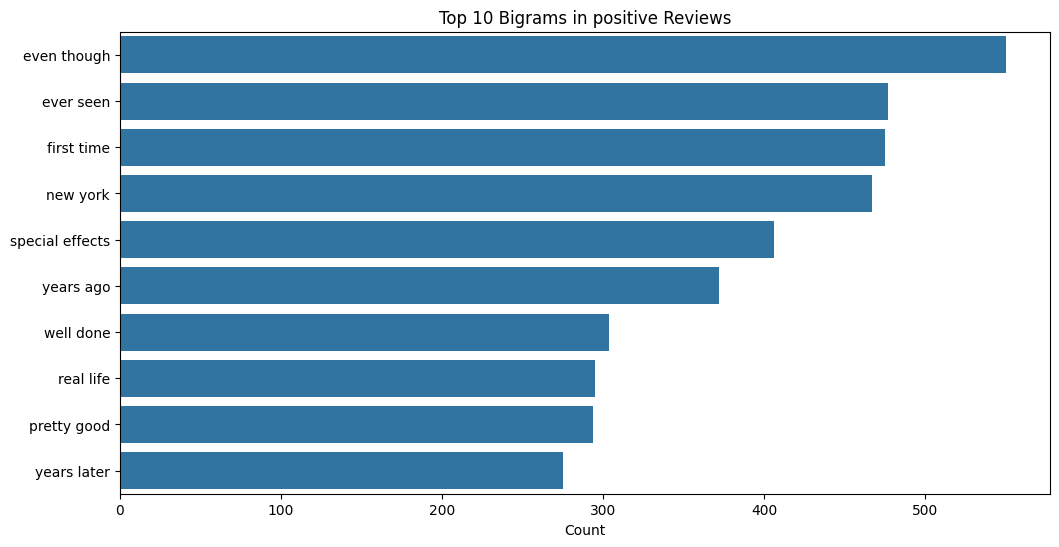

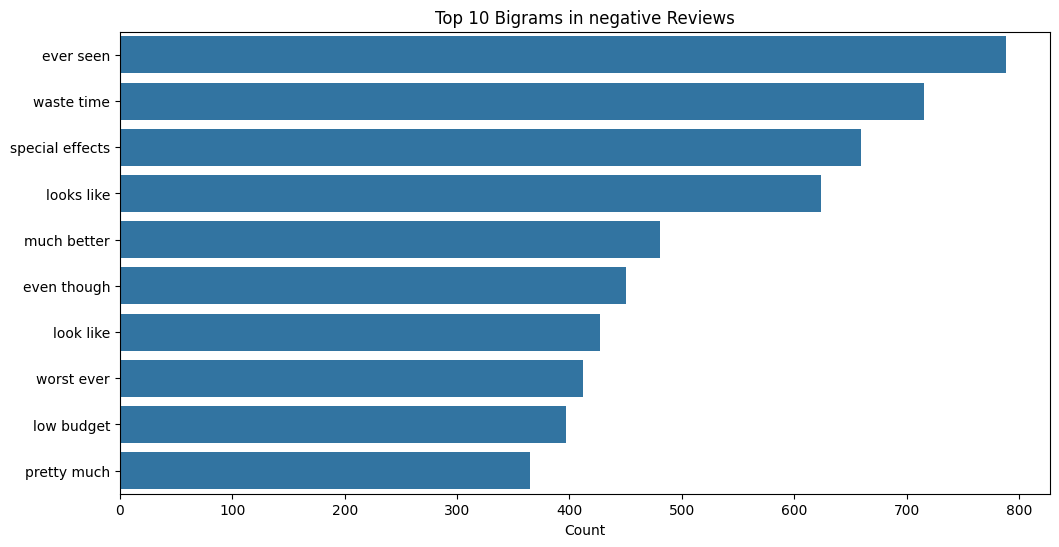

In [ ]:
# Visualize top bigrams
def plot_top_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    words = [' '.join(word) for word in words]
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=words)
    plt.title(title)
    plt.xlabel('Count')
    plt.show()

for sentiment in ['positive', 'negative']:
    text = ' '.join(data[data['sentiment'] == sentiment]['review'])
    top_bigrams = get_top_ngrams(text, 2, 10)
    plot_top_ngrams(top_bigrams, f'Top 10 Bigrams in {sentiment} Reviews')

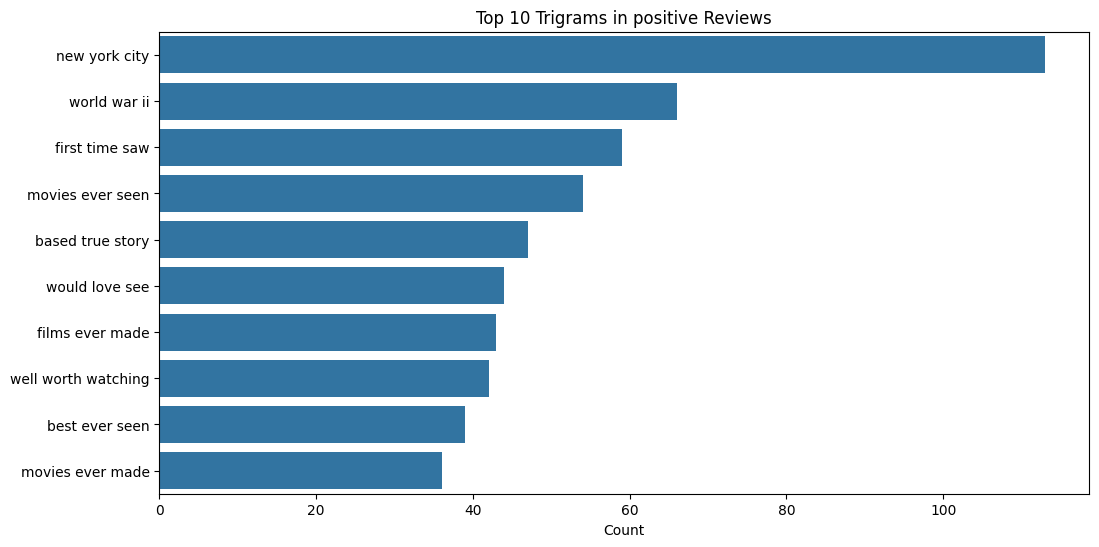

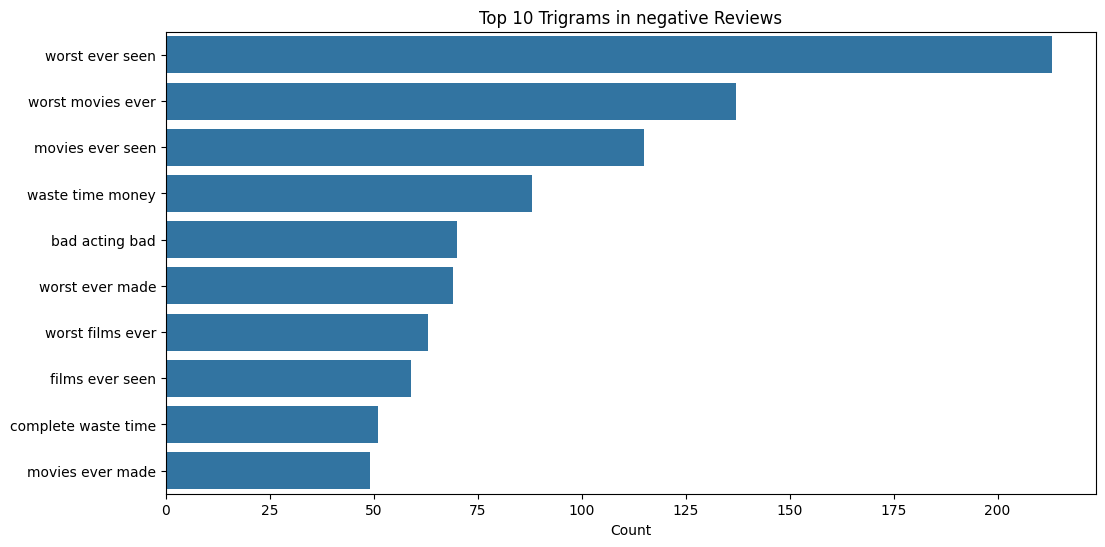

In [ ]:
for sentiment in ['positive', 'negative']:
    text = ' '.join(data[data['sentiment'] == sentiment]['review'])
    top_trigrams = get_top_ngrams(text, 3, 10)
    plot_top_ngrams(top_trigrams, f'Top 10 Trigrams in {sentiment} Reviews')

# Lemmatization and Stemming

In [ ]:
# Tokenize the reviews
import nltk, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def tokenize(text):
    tokens = word_tokenize(text)

    # Convert to lowercase and remove punctuation
    tokens = [word.lower() for word in tokens if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    tokens = [word for word in tokens if word not in stop_words]
    return tokens

data['tokens'] = data['review'].apply(tokenize)
data_test['tokens'] = data_test['review'].apply(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.sample(3).tokens

24130    [neil, simon, knack, dialog, nowhere, evident,...
18363    ['ve, noticed, lot, people, post, ``, kerching...
11297    [saw, trailer, tv, surprised, may, 2008, six, ...
Name: tokens, dtype: object

In [ ]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

data['stemmed_tokens'] = data['tokens'].apply(stem_tokens)
data_test['stemmed_tokens'] = data_test['tokens'].apply(stem_tokens)

In [ ]:
data.sample(3).stemmed_tokens

14167    [see, trailer, even, probabl, first, think, gr...
19745    [deathtrap, run, like, play, within, movi, pri...
10228    [imagin, hitchcock, scholar, expert, find, tog...
Name: stemmed_tokens, dtype: object

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

data['lemmatized_tokens'] = data['tokens'].apply(lemmatize_tokens)
data_test['lemmatized_tokens'] = data_test['tokens'].apply(lemmatize_tokens)

In [ ]:
data.sample(3).lemmatized_tokens

2815     [order, avoid, confusion, let, clarify, couple...
23080    [good, movie, recommend, n't, like, intelligen...
6589     [see, laurel, hardy, classic, film, always, en...
Name: lemmatized_tokens, dtype: object

In [ ]:
# Convert tokens back to text
data['stemmed_review'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))
data['lemmatized_review'] = data['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

data_test['lemmatized_review']  = data_test['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))
data_test['stemmed_review'] = data_test['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

# Display sample results
data.sample(3)[['review', 'stemmed_review', 'lemmatized_review']]

review  \
18340  This is, in my opinion, a very good film, espe...   
7951   Suppose you've been on a deserted island the l...   
20813  Dirty Harry has to track down a rape victim wh...   

                                          stemmed_review  \
18340  opinion good film especi michael jackson lover...   
7951   suppos 've desert island last ten year n't hea...   
20813  dirti harri track rape victim extract reveng s...   

                                       lemmatized_review  
18340  opinion good film especially michael jackson l...  
7951   suppose 've desert island last ten year n't he...  
20813  dirty harry track rape victim extract revenge ...

In [ ]:
# Comparing the Vocab Size
def vocab_size(text_series):
    return len(set(' '.join(text_series).split()))

print("Original Vocab Size:", vocab_size(data['review']))
print("Stemmed Vocab Size:", vocab_size(data['stemmed_review']))
print("Lemmatized Vocab Size:", vocab_size(data['lemmatized_review']))

Original Vocab Size: 294366
Stemmed Vocab Size: 106238
Lemmatized Vocab Size: 117517


In [ ]:
# Save preprocessed data
data.to_csv('drive/MyDrive/datasets/aclImdb/preprocessed_reviews.csv', index=False)
data_test.to_csv('drive/MyDrive/datasets/aclImdb/preprocessed_test_reviews.csv', index=False)

# Model Training and Predictive Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/datasets/aclImdb/preprocessed_reviews.csv')
data_test = pd.read_csv('drive/MyDrive/datasets/aclImdb/preprocessed_test_reviews.csv')

In [4]:
X_train_lemmatized = data['lemmatized_review']
X_train_stemmed = data['stemmed_review']
X_train_normal = data['review']
y_train = data['sentiment']

X_test_lemmatized = data_test['lemmatized_review']
X_test_stemmed = data_test['stemmed_review']
X_test_normal = data_test['review']
y_test = data['sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot classification report
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Results:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - {model_name}')

# Function to train and evaluate model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, text_type):
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print(f"\n{model_name} - {text_type} Results:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - {model_name} ({text_type})')

# To specify the type of device(CPU or a GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Naive Bayes


Best Naive Bayes parameters for Lemmatized text: {'alpha': 2.0}

Naive Bayes - Lemmatized Results:
              precision    recall  f1-score   support

    negative       0.50      0.52      0.51     12500
    positive       0.50      0.48      0.49     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



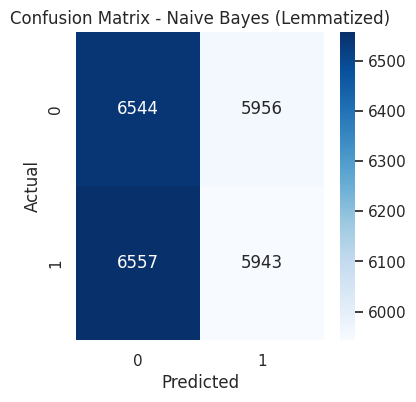


Best Naive Bayes parameters for Stemmed text: {'alpha': 2.0}

Naive Bayes - Stemmed Results:
              precision    recall  f1-score   support

    negative       0.50      0.52      0.51     12500
    positive       0.50      0.47      0.49     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



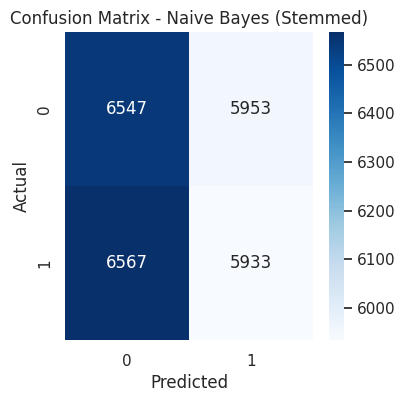


Best Naive Bayes parameters for Normal text: {'alpha': 2.0}

Naive Bayes - Normal Results:
              precision    recall  f1-score   support

    negative       0.50      0.52      0.51     12500
    positive       0.50      0.47      0.49     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



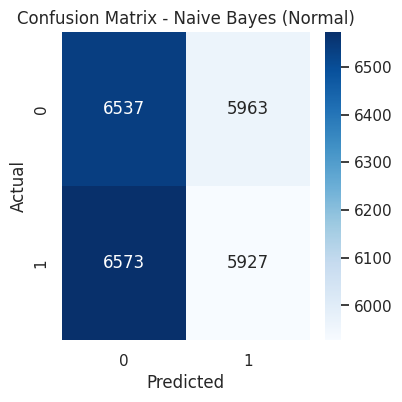


Time taken for training: 1.44 minutes


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import time

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
nb = MultinomialNB()
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

before = time.time()
for text_type, X_train, X_test in [('Lemmatized', X_train_lemmatized, X_test_lemmatized),
                                   ('Stemmed', X_train_stemmed, X_test_stemmed),
                                   ('Normal', X_train_normal, X_test_normal)]:
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    grid_search.fit(X_train_tfidf, y_train)
    best_nb = grid_search.best_estimator_

    print(f"\nBest Naive Bayes parameters for {text_type} text:", grid_search.best_params_)
    train_evaluate_model(best_nb, X_train, X_test, y_train, y_test, "Naive Bayes", text_type)
after = time.time()

print(f"\nTime taken for training: {(after - before) / 60:.2f} minutes")

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

before = time.time()
# ('Lemmatized', X_train_lemmatized, X_test_lemmatized),
#                                    ('Stemmed', X_train_stemmed, X_test_stemmed),

for text_type, X_train, X_test in [('Normal', X_train_normal, X_test_normal)]:
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    grid_search.fit(X_train_tfidf, y_train)
    best_svm = grid_search.best_estimator_

    print(f"\nBest SVM parameters for {text_type} text:", grid_search.best_params_)
    train_evaluate_model(best_svm, X_train, X_test, y_train, y_test, "SVM", text_type)

after = time.time()
print(f"\nTime taken for training: {(after - before) / 60:.2f} minutes")

## Logistic Regression


Best Logistic Regression parameters for Lemmatized text: {'C': 1, 'penalty': 'l1'}

Logistic Regression - Lemmatized Results:
              precision    recall  f1-score   support

    negative       0.50      0.49      0.50     12500
    positive       0.50      0.51      0.51     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



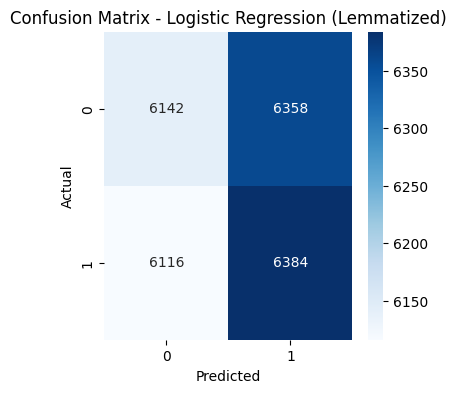


Best Logistic Regression parameters for Stemmed text: {'C': 1, 'penalty': 'l1'}

Logistic Regression - Stemmed Results:
              precision    recall  f1-score   support

    negative       0.50      0.49      0.49     12500
    positive       0.50      0.51      0.50     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



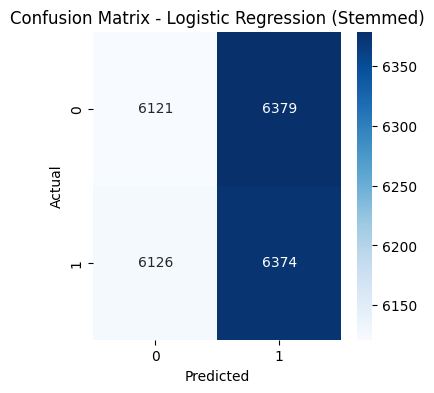


Best Logistic Regression parameters for Normal text: {'C': 1, 'penalty': 'l1'}

Logistic Regression - Normal Results:
              precision    recall  f1-score   support

    negative       0.50      0.49      0.49     12500
    positive       0.50      0.51      0.51     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



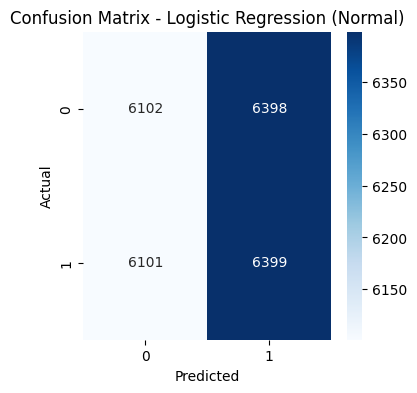


Time taken for training: 2.30 minutes


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr = LogisticRegression(solver='liblinear', max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


before = time.time()
for text_type, X_train, X_test in [('Lemmatized', X_train_lemmatized, X_test_lemmatized),
                                   ('Stemmed', X_train_stemmed, X_test_stemmed),
                                   ('Normal', X_train_normal, X_test_normal)]:
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    grid_search.fit(X_train_tfidf, y_train)
    best_lr = grid_search.best_estimator_

    print(f"\nBest Logistic Regression parameters for {text_type} text:", grid_search.best_params_)
    train_evaluate_model(best_lr, X_train, X_test, y_train, y_test, "Logistic Regression", text_type)

after = time.time()
print(f"\nTime taken for training: {(after - before) / 60:.2f} minutes")

## Random Forest


Best Random Forest parameters for Lemmatized text: {'max_depth': None, 'n_estimators': 200}

Random Forest - Lemmatized Results:
              precision    recall  f1-score   support

    negative       0.49      0.51      0.50     12500
    positive       0.49      0.48      0.49     12500

    accuracy                           0.49     25000
   macro avg       0.49      0.49      0.49     25000
weighted avg       0.49      0.49      0.49     25000



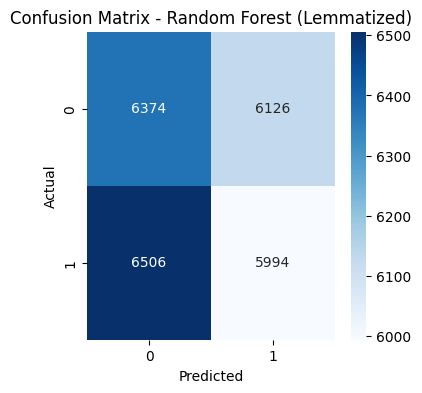


Best Random Forest parameters for Stemmed text: {'max_depth': None, 'n_estimators': 200}

Random Forest - Stemmed Results:
              precision    recall  f1-score   support

    negative       0.49      0.51      0.50     12500
    positive       0.49      0.48      0.49     12500

    accuracy                           0.49     25000
   macro avg       0.49      0.49      0.49     25000
weighted avg       0.49      0.49      0.49     25000



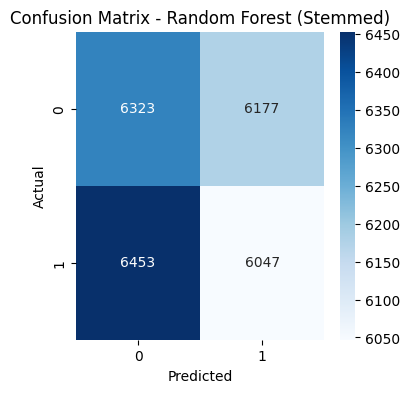


Best Random Forest parameters for Normal text: {'max_depth': None, 'n_estimators': 200}

Random Forest - Normal Results:
              precision    recall  f1-score   support

    negative       0.50      0.51      0.50     12500
    positive       0.50      0.49      0.49     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



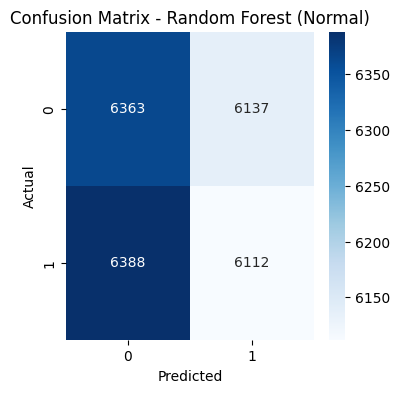


Time taken for training: 1701665496.04 minutes


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

before = time.time()
for text_type, X_train, X_test in [('Lemmatized', X_train_lemmatized, X_test_lemmatized),
                                   ('Stemmed', X_train_stemmed, X_test_stemmed),
                                   ('Normal', X_train_normal, X_test_normal)]:
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    grid_search.fit(X_train_tfidf, y_train)
    best_rf = grid_search.best_estimator_

    print(f"\nBest Random Forest parameters for {text_type} text:", grid_search.best_params_)
    train_evaluate_model(best_rf, X_train, X_test, y_train, y_test, "Random Forest", text_type)

after = time.time()
print(f"\nTime taken for training: {after - before / 60:.2f} minutes")

## LSTM

In [ ]:
! pip install optuna --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Checking for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### Helper Functions

In [ ]:
# Preparing datasets
texts = {
    'normal': (X_train_normal, X_test_normal, y_train, y_test),
    'lemmatized': (X_train_lemmatized, X_test_lemmatized, y_train, y_test),
    'stemmed': (X_train_stemmed, X_test_stemmed, y_train, y_test)
}

labels = data['sentiment']

# Create vocabulary
def create_vocabulary(text_series):
    vocab = set()
    for text in text_series:
        vocab.update(text.split())
    return {word: i+1 for i, word in enumerate(vocab)}

# Tokenization
def tokenize(text, vocab):
    return [vocab.get(word, 0) for word in text.split()]

# Dataset Wrapper
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, vocab):
        self.texts = [tokenize(text, vocab) for text in texts]
        self.labels = labels.tolist()

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx]), self.labels[idx]


# Padding function
def pad_sequence(batch):
    texts, labels = zip(*batch)
    padded_texts = nn.utils.rnn.pad_sequence(texts, batch_first=True)
    return padded_texts, torch.tensor(labels)

# LSTM Model Wrapper
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        output, (hidden, cell) = self.lstm(embedded)
        hidden = self.dropout(hidden[-1])
        return self.fc(hidden)

# Model Training
def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    for batch in iterator:
        texts, labels = batch
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        predictions = model(texts)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(iterator)

# Evaluator
def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in iterator:
            texts, labels = batch
            texts, labels = texts.to(device), labels.to(device)
            predictions = model(texts)
            loss = criterion(predictions, labels)
            epoch_loss += loss.item()
            all_preds.extend(predictions.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return epoch_loss / len(iterator), all_preds, all_labels

# Hyperparameter tuning using optuna
num_epochs = 5
def objective(trial, X_train, y_train, X_val, y_val, vocab):
    # Hyperparameters
    embed_dim = trial.suggest_int('embed_dim', 50, 300)
    hidden_dim = trial.suggest_int('hidden_dim', 64, 256)
    n_layers = trial.suggest_int('n_layers', 1, 3)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)

    # Model
    model = LSTMClassifier(len(vocab), embed_dim, hidden_dim, 2, n_layers, dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # datasets and dataloaders
    train_dataset = SentimentDataset(X_train, y_train, vocab)
    val_dataset = SentimentDataset(X_val, y_val, vocab)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=pad_sequence)
    val_loader = DataLoader(val_dataset, batch_size=32, collate_fn=pad_sequence)

    # Training loop
    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, criterion)
        val_loss, _, _ = evaluate(model, val_loader, criterion)

    return val_loss


### Training and Evaluation Loop

In [ ]:
texts = {
    'normal': (X_train_normal, X_test_normal,
               y_train.map({'positive': 1, 'negative': 0}),
               y_test.map({'positive': 1, 'negative': 0})),
    'lemmatized': (X_train_lemmatized, X_test_lemmatized,
                   y_train.map({'positive': 1, 'negative': 0}),
                  y_test.map({'positive': 1, 'negative': 0})),
    'stemmed': (X_train_stemmed, X_test_stemmed,
                y_train.map({'positive': 1, 'negative': 0}),
                y_test.map({'positive': 1, 'negative': 0}))
}

In [1]:
results = {}
num_epochs = 3
for text_type, text_series in texts.items():
    print(f"\nTraining on {text_type} text")

    # Create vocabulary
    train_vocab = create_vocabulary(text_series[0])
    test_vocab = create_vocabulary(text_series[1])

    X_train, X_test, y_train, y_test = text_series

    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Hyperparameter tuning
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val, train_vocab), n_trials=20)

    # Train model with best hyperparameters
    best_params = study.best_params
    model = LSTMClassifier(len(train_vocab), best_params['embed_dim'], best_params['hidden_dim'],
                           2, best_params['n_layers'], best_params['dropout']).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=best_params['lr'])
    criterion = nn.CrossEntropyLoss()

    train_dataset = SentimentDataset(X_train, y_train, train_vocab)
    test_dataset = SentimentDataset(X_test, y_test, test_vocab)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=pad_sequence)
    test_loader = DataLoader(test_dataset, batch_size=32, collate_fn=pad_sequence)

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, criterion)
        test_loss, test_preds, test_labels = evaluate(model, test_loader, criterion)
        print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.3f}, Test Loss: {test_loss:.3f}')

    # Evaluation
    print("\nClassification Report:")
    print(classification_report(test_labels, test_preds))

    cm = confusion_matrix(test_labels, test_preds)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {text_type.capitalize()} Text')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    results[text_type] = {
        'best_params': best_params,
        'classification_report': classification_report(test_labels, test_preds, output_dict=True),
        'confusion_matrix': cm
    }


NameError: name 'texts' is not defined

In [ ]:
# Compare results
for text_type, result in results.items():
    print(f"\n{text_type.capitalize()} Text Results:")
    print(f"Best Hyperparameters: {result['best_params']}")
    print(f"Accuracy: {result['classification_report']['accuracy']:.3f}")
    print(f"Macro F1-score: {result['classification_report']['macro avg']['f1-score']:.3f}")

## Transformer Model - BERT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

train_texts, val_texts, train_labels, val_labels = train_test_split(
    X_train_normal, y_train, test_size=0.2, random_state=42)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# dataset wrapper
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
train_labels = train_labels.map({'positive': 1, 'negative': 0})
val_labels = val_labels.map({'positive': 1, 'negative': 0})
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
val_dataset = SentimentDataset(val_texts, val_labels, tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Load the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels=len(data['sentiment'].unique()))
model = model.to(device)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


Using device: cuda


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### BERT Model Training

Epoch 1/3: 100%|██████████| 1250/1250 [08:33<00:00,  2.44it/s]


Epoch 1/3, Loss: 0.30162335557341574


Validation: 100%|██████████| 313/313 [00:59<00:00,  5.25it/s]


Validation Loss: 0.2727460556041699

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2515
           1       0.85      0.94      0.89      2485

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



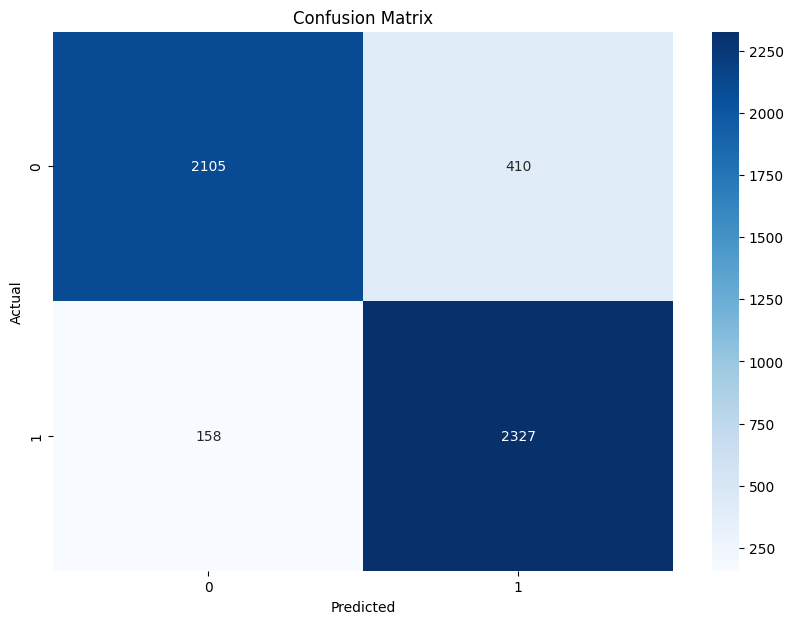

Epoch 2/3: 100%|██████████| 1250/1250 [08:29<00:00,  2.45it/s]


Epoch 2/3, Loss: 0.1755695701956749


Validation: 100%|██████████| 313/313 [00:58<00:00,  5.33it/s]


Validation Loss: 0.31797114887331335

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2515
           1       0.86      0.93      0.89      2485

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



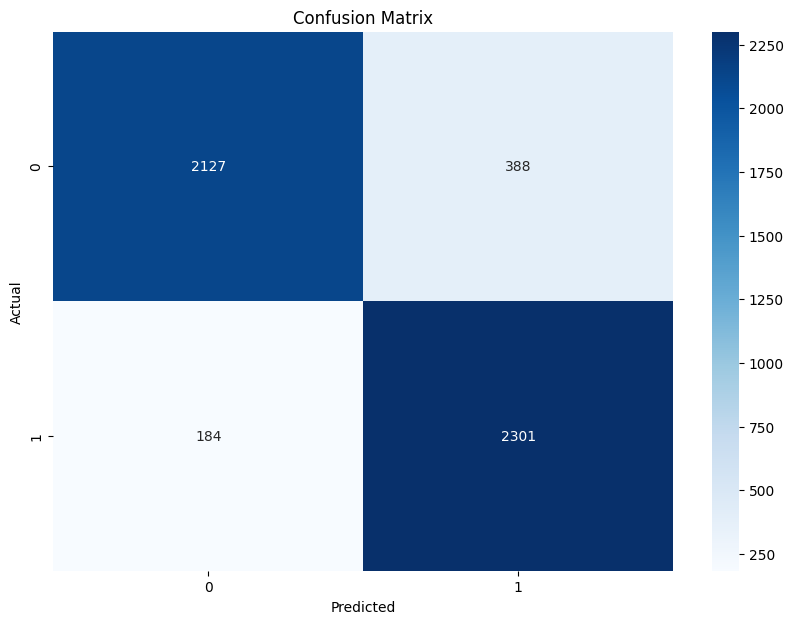

Epoch 3/3: 100%|██████████| 1250/1250 [08:30<00:00,  2.45it/s]


Epoch 3/3, Loss: 0.08867077046856284


Validation: 100%|██████████| 313/313 [00:58<00:00,  5.32it/s]


Validation Loss: 0.3472040735226803

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2515
           1       0.91      0.85      0.88      2485

    accuracy                           0.88      5000
   macro avg       0.89      0.88      0.88      5000
weighted avg       0.89      0.88      0.88      5000



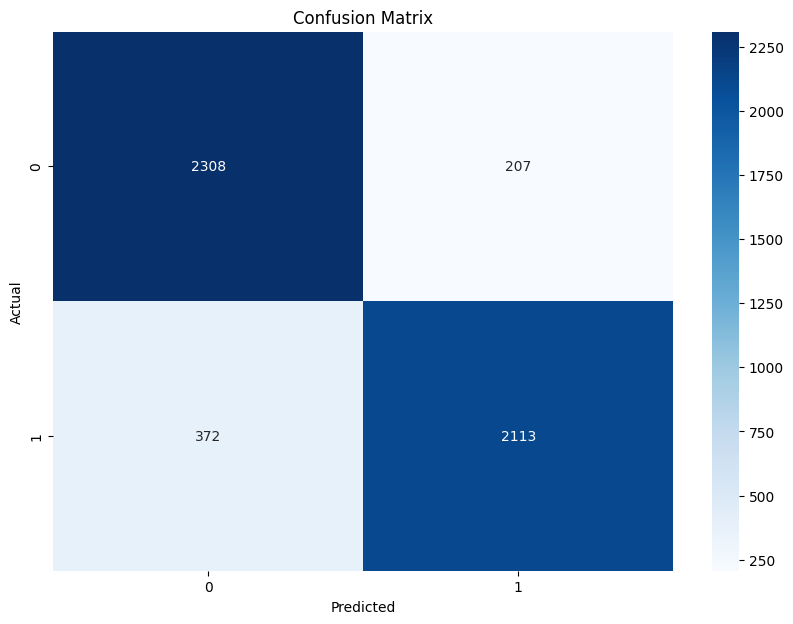

In [ ]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss/len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            predictions.extend(preds.cpu().tolist())
            true_labels.extend(labels.cpu().tolist())

    val_loss /= len(val_loader)
    print(f"Validation Loss: {val_loss}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predictions))

    # Create and plot confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
from datetime import date
today = date.today()
date_string = today.strftime("%d-%m-%Y")


# To save model train on a GPU
trained_models_dir = '/content/drive/MyDrive/trained_models'
model.save_pretrained(f'{trained_models_dir}/bert-movie-review-sentiment-classifier_{date_string}')
tokenizer.save_pretrained(f'{trained_models_dir}/bert-movie-review-sentiment-classifier_{date_string}')

('/content/drive/MyDrive/trained_models/bert-movie-review-sentiment-classifier_02-11-2024/tokenizer_config.json',
 '/content/drive/MyDrive/trained_models/bert-movie-review-sentiment-classifier_02-11-2024/special_tokens_map.json',
 '/content/drive/MyDrive/trained_models/bert-movie-review-sentiment-classifier_02-11-2024/vocab.txt',
 '/content/drive/MyDrive/trained_models/bert-movie-review-sentiment-classifier_02-11-2024/added_tokens.json')

## Tool Calling Agent

In [ ]:
! pip install langchain langchain-openai openai --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.8 MB/s eta 0:00:00


In [ ]:
import os
from langchain.agents import initialize_agent, Tool, tool
from langchain.agents import AgentType
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain.evaluation import load_evaluator

# API KEY
os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

@tool
def submit_sentiment(sentiment: str):
  '''tool to submit the sentiment'''
  return sentiment

tools = [submit_sentiment]

# Initialize the language model
llm = ChatOpenAI(temperature=0, model='gpt-3.5-turbo')
llm.bind_tools(tools)

prompt = "Analyze the sentiment of the following text. Respond strictly with either \
'positive' or 'negative' lowercase only. There is no neutral sentiment. Use the submit_sentiment tool to submit \
the sentiment."

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", prompt),
        ("human", "{text}")
    ]
)

chain = LLMChain(llm=llm, prompt=prompt)


In [ ]:
# restricting the data to 1,000 because it's paid API :)
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

data_test_restricted = data_test.sample(1000)

y_pred = []

for index, row in tqdm(data_test_restricted.iterrows(), total=data_test_restricted.shape[0]):
  review = row['review']
  sentiment = row['sentiment']
  y_pred.append(chain.invoke({"text": review})['text'])

100%|██████████| 1000/1000 [08:02<00:00,  2.07it/s]


              precision    recall  f1-score   support

    negative       0.88      0.97      0.92       487
    positive       0.97      0.87      0.92       513

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



Text(0.5, 25.722222222222214, 'Predicted')

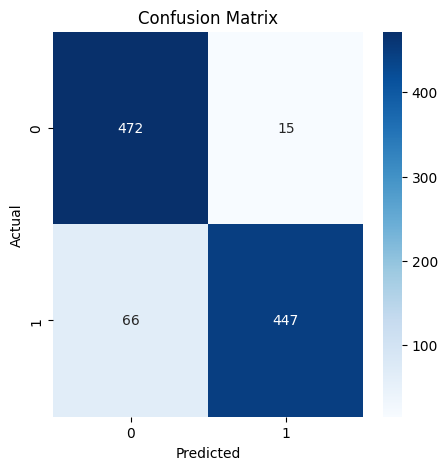

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# classification report and confusion matrix
print(classification_report(data_test_restricted['sentiment'], y_pred))
cm = confusion_matrix(data_test_restricted['sentiment'], y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')